<a href="https://colab.research.google.com/github/Ronaldojerang/BSNL_project-/blob/main/bsnlproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive

drive.mount ('/content/drive')



Mounted at /content/drive


In [6]:
cd drive/MyDrive/

/content/drive/MyDrive


In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("HourlyyeNode_dropfile.csv")

In [9]:
df

,Unnamed: 0,Index,StartTime,EndTime,QueryGranularity,Subnetwork,SubnetworkName,ManagedElement,ManagedElementName,Cell,...,MaxActiveUsersDl,VolteUsers_SD,"VIL_VoLTECallSetupSuccessRate,",zte_Voltetraffic,CellUnavailableTime_s,CSFBATTEMPTS,CSFBSUCCESS,TotalNumberofCSFBMTcalls,TotalNumberofCSFBMO,RRCSetupSuccessRate
0,0,1,2022-04-01 00:00:00,2022-04-01 01:00:00,1Hour(s),107,N2_LTE_107_ZTE_NE2(107),4001,Z4NEP8ARPLIT023.SBHALL(4001),1,...,15,0.01,100.00%,0.0133,0,18,18,4,1,99.96%
1,1,2,2022-04-01 00:00:00,2022-04-01 01:00:00,1Hour(s),107,N2_LTE_107_ZTE_NE2(107),4001,Z4NEP8ARPLIT023.SBHALL(4001),2,...,15,0.00,0.00%,0.0000,0,13,13,1,1,99.97%
2,2,3,2022-04-01 00:00:00,2022-04-01 01:00:00,1Hour(s),107,N2_LTE_107_ZTE_NE2(107),4001,Z4NEP8ARPLIT023.SBHALL(4001),3,...,12,0.00,0.00%,0.0000,0,6,6,2,0,99.63%
3,3,4,2022-04-01 00:00:00,2022-04-01 01:00:00,1Hour(s),107,N2_LTE_107_ZTE_NE2(107),4002,Z4NEP8ARPLIT002.SATELLITE COMPLEX(4002),1,...,8,0.00,0.00%,0.0000,0,0,0,0,0,99.89%
4,4,5,2022-04-01 00:00:00,2022-04-01 01:00:00,1Hour(s),107,N2_LTE_107_ZTE_NE2(107),4002,Z4NEP8ARPLIT002.SATELLITE COMPLEX(4002),2,...,32,0.03,100.00%,0.0239,0,11,11,0,1,99.94%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93847,93847,93848,2022-04-30 23:00:00,2022-05-01 00:00:00,1Hour(s),107,N2_LTE_107_ZTE_NE2(107),4106,Z4NEP8ARPLPS006.DIKING ATC IP(4106),2,...,12,0.00,0.00%,0.0000,0,10,10,0,6,99.94%
93848,93848,93849,2022-04-30 23:00:00,2022-05-01 00:00:00,1Hour(s),107,N2_LTE_107_ZTE_NE2(107),4106,Z4NEP8ARPLPS006.DIKING ATC IP(4106),3,...,10,0.00,0.00%,0.0000,0,5,5,1,2,100.00%
93849,93849,93850,2022-04-30 23:00:00,2022-05-01 00:00:00,1Hour(s),107,N2_LTE_107_ZTE_NE2(107),4303,Z4NEP8ARPLPS016.Pasighat Market(4303),1,...,10,0.00,0.00%,0.0000,0,5,5,1,0,99.56%
93850,93850,93851,2022-04-30 23:00:00,2022-05-01 00:00:00,1Hour(s),107,N2_LTE_107_ZTE_NE2(107),4303,Z4NEP8ARPLPS016.Pasighat Market(4303),2,...,25,0.00,0.00%,0.0000,0,18,18,4,0,99.92%


In [10]:
pip install -q tensorflow-recommenders

     |████████████████████████████████| 89 kB 4.2 MB/s 


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import seaborn as sns
import pprint
import tempfile

from typing import Dict, Text
import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs
from sklearn.model_selection import train_test_split


In [12]:
df.isnull().sum()

Unnamed: 0                        0
Index                             0
StartTime                         0
EndTime                           0
QueryGranularity                  0
Subnetwork                        0
SubnetworkName                    0
ManagedElement                    0
ManagedElementName                0
Cell                              0
CellName                          0
eNodeB                            0
eNodeBName                        0
Product                           0
TotalDataVolumeDL_MB              0
TotalDataVolumeUL_MB              0
TotalDataVolume_GB                0
DLUserThroughput_Mbps             0
ULUserThroughput_Mbps             0
AverageLatencyDownlink            0
Dash_DL_Latency_                  0
MaxActiveUsersUL                  0
MaxActiveUsersDl                  0
VolteUsers_SD                     0
VIL_VoLTECallSetupSuccessRate,    0
zte_Voltetraffic                  0
CellUnavailableTime_s             0
CSFBATTEMPTS                

In [13]:
dff = pd.get_dummies(df)

In [14]:
dff

,Unnamed: 0,Index,Subnetwork,ManagedElement,Cell,eNodeB,TotalDataVolumeDL_MB,TotalDataVolumeUL_MB,TotalDataVolume_GB,DLUserThroughput_Mbps,...,RRCSetupSuccessRate_99.90%,RRCSetupSuccessRate_99.91%,RRCSetupSuccessRate_99.92%,RRCSetupSuccessRate_99.93%,RRCSetupSuccessRate_99.94%,RRCSetupSuccessRate_99.95%,RRCSetupSuccessRate_99.96%,RRCSetupSuccessRate_99.97%,RRCSetupSuccessRate_99.98%,RRCSetupSuccessRate_99.99%
0,0,1,107,4001,1,4001,2863.6157,249.9169,3.0406,6.57,...,0,0,0,0,0,0,1,0,0,0
1,1,2,107,4001,2,4001,1161.6944,165.6718,1.2963,3.96,...,0,0,0,0,0,0,0,1,0,0
2,2,3,107,4001,3,4001,870.2009,125.4978,0.9724,2.37,...,0,0,0,0,0,0,0,0,0,0
3,3,4,107,4002,1,4002,570.2097,99.1890,0.6537,3.97,...,0,0,0,0,0,0,0,0,0,0
4,4,5,107,4002,2,4002,3779.8205,678.4902,4.3538,1.49,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93847,93847,93848,107,4106,2,4106,885.5364,397.9253,1.2534,10.31,...,0,0,0,0,1,0,0,0,0,0
93848,93848,93849,107,4106,3,4106,1246.2359,161.5164,1.3748,12.74,...,0,0,0,0,0,0,0,0,0,0
93849,93849,93850,107,4303,1,4303,196.7543,48.1684,0.2392,2.98,...,0,0,0,0,0,0,0,0,0,0
93850,93850,93851,107,4303,2,4303,2704.4833,330.8820,2.9642,2.83,...,0,0,1,0,0,0,0,0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler= StandardScaler()
scaled = scaler.fit_transform(dff)

In [17]:
dff

,Unnamed: 0,Index,Subnetwork,ManagedElement,Cell,eNodeB,TotalDataVolumeDL_MB,TotalDataVolumeUL_MB,TotalDataVolume_GB,DLUserThroughput_Mbps,...,RRCSetupSuccessRate_99.90%,RRCSetupSuccessRate_99.91%,RRCSetupSuccessRate_99.92%,RRCSetupSuccessRate_99.93%,RRCSetupSuccessRate_99.94%,RRCSetupSuccessRate_99.95%,RRCSetupSuccessRate_99.96%,RRCSetupSuccessRate_99.97%,RRCSetupSuccessRate_99.98%,RRCSetupSuccessRate_99.99%
0,0,1,107,4001,1,4001,2863.6157,249.9169,3.0406,6.57,...,0,0,0,0,0,0,1,0,0,0
1,1,2,107,4001,2,4001,1161.6944,165.6718,1.2963,3.96,...,0,0,0,0,0,0,0,1,0,0
2,2,3,107,4001,3,4001,870.2009,125.4978,0.9724,2.37,...,0,0,0,0,0,0,0,0,0,0
3,3,4,107,4002,1,4002,570.2097,99.1890,0.6537,3.97,...,0,0,0,0,0,0,0,0,0,0
4,4,5,107,4002,2,4002,3779.8205,678.4902,4.3538,1.49,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93847,93847,93848,107,4106,2,4106,885.5364,397.9253,1.2534,10.31,...,0,0,0,0,1,0,0,0,0,0
93848,93848,93849,107,4106,3,4106,1246.2359,161.5164,1.3748,12.74,...,0,0,0,0,0,0,0,0,0,0
93849,93849,93850,107,4303,1,4303,196.7543,48.1684,0.2392,2.98,...,0,0,0,0,0,0,0,0,0,0
93850,93850,93851,107,4303,2,4303,2704.4833,330.8820,2.9642,2.83,...,0,0,1,0,0,0,0,0,0,0


In [18]:
dff= pd.DataFrame(data = scaled , columns = dff.columns)

In [19]:
dff

,Unnamed: 0,Index,Subnetwork,ManagedElement,Cell,eNodeB,TotalDataVolumeDL_MB,TotalDataVolumeUL_MB,TotalDataVolume_GB,DLUserThroughput_Mbps,...,RRCSetupSuccessRate_99.90%,RRCSetupSuccessRate_99.91%,RRCSetupSuccessRate_99.92%,RRCSetupSuccessRate_99.93%,RRCSetupSuccessRate_99.94%,RRCSetupSuccessRate_99.95%,RRCSetupSuccessRate_99.96%,RRCSetupSuccessRate_99.97%,RRCSetupSuccessRate_99.98%,RRCSetupSuccessRate_99.99%
0,-1.732032,-1.732032,0.0,-0.762312,-1.221184,-0.762312,1.235753,0.253574,1.119836,0.566766,...,-0.170095,-0.172533,-0.176360,-0.186266,-0.195177,-0.200699,4.805779,-0.209001,-0.19923,-0.120852
1,-1.731995,-1.731995,0.0,-0.762312,-0.000780,-0.762312,-0.152063,-0.188699,-0.159247,-0.159657,...,-0.170095,-0.172533,-0.176360,-0.186266,-0.195177,-0.200699,-0.208083,4.784671,-0.19923,-0.120852
2,-1.731959,-1.731959,0.0,-0.762312,1.219623,-0.762312,-0.389759,-0.399606,-0.396760,-0.602191,...,-0.170095,-0.172533,-0.176360,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923,-0.120852
3,-1.731922,-1.731922,0.0,-0.740881,-1.221184,-0.740881,-0.634385,-0.537723,-0.630461,-0.156874,...,-0.170095,-0.172533,-0.176360,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923,-0.120852
4,-1.731885,-1.731885,0.0,-0.740881,-0.000780,-0.740881,1.982865,2.503516,2.082796,-0.847115,...,-0.170095,-0.172533,-0.176360,-0.186266,5.123560,-0.200699,-0.208083,-0.209001,-0.19923,-0.120852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93847,1.731885,1.731885,0.0,1.487960,-0.000780,1.487960,-0.377254,1.030595,-0.190705,1.607694,...,-0.170095,-0.172533,-0.176360,-0.186266,5.123560,-0.200699,-0.208083,-0.209001,-0.19923,-0.120852
93848,1.731922,1.731922,0.0,1.487960,1.219623,1.487960,-0.083125,-0.210514,-0.101683,2.284019,...,-0.170095,-0.172533,-0.176360,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923,-0.120852
93849,1.731959,1.731959,0.0,5.709898,-1.221184,5.709898,-0.938915,-0.805573,-0.934411,-0.432413,...,-0.170095,-0.172533,-0.176360,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923,-0.120852
93850,1.731995,1.731995,0.0,5.709898,-0.000780,5.709898,1.105990,0.678628,1.063812,-0.474162,...,-0.170095,-0.172533,5.670232,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923,-0.120852


In [20]:
from sklearn.cluster import KMeans


In [21]:
kmc = KMeans(n_clusters = 4 )

In [22]:
kmc.fit(dff)

KMeans(n_clusters=4)

In [23]:
kmc.predict(dff)

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [24]:
kmc = KMeans(n_clusters = 2)
kmc

KMeans(n_clusters=2)

In [25]:
kmc.fit(dff)

KMeans(n_clusters=2)

In [26]:
kmc.predict(dff)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [27]:
kmc = KMeans(n_clusters = 4 )

In [28]:
kmc.fit(dff)

KMeans(n_clusters=4)

In [29]:
kmc.predict(dff)

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [30]:
ssd= []
for k in range(2,10):
    kmc = KMeans(n_clusters = k)
    kmc.fit(dff)
    ssd.append(kmc.inertia_)
ssd

[201003736.54284757,
 200710119.07551008,
 200536067.02869415,
 200237962.58958256,
 200219957.0877762,
 199980648.97887117,
 199699380.58450755,
 199661166.9009291]

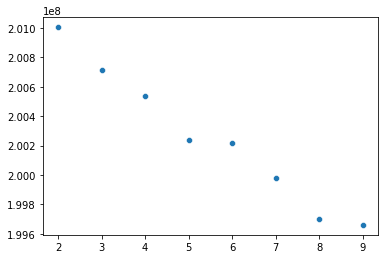

In [31]:
sns.scatterplot(x = range(2,10), y = ssd)

In [32]:
kmc = KMeans(n_clusters = 4 )

In [33]:
kmc.fit(dff)

KMeans(n_clusters=4)

In [34]:
kmc.predict(dff)

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [35]:

X = dff.iloc[:, :-1]
y = dff.iloc[:, -1]

In [36]:
X_trainfull, X_test, y_trainfull, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [37]:
X_trainfull

,Unnamed: 0,Index,Subnetwork,ManagedElement,Cell,eNodeB,TotalDataVolumeDL_MB,TotalDataVolumeUL_MB,TotalDataVolume_GB,DLUserThroughput_Mbps,...,RRCSetupSuccessRate_99.89%,RRCSetupSuccessRate_99.90%,RRCSetupSuccessRate_99.91%,RRCSetupSuccessRate_99.92%,RRCSetupSuccessRate_99.93%,RRCSetupSuccessRate_99.94%,RRCSetupSuccessRate_99.95%,RRCSetupSuccessRate_99.96%,RRCSetupSuccessRate_99.97%,RRCSetupSuccessRate_99.98%
38989,-0.292938,-0.292938,0.0,0.073503,-1.221184,0.073503,-0.461758,-0.522599,-0.476763,2.250620,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.199230
794,-1.702726,-1.702726,0.0,-0.719450,1.219623,-0.719450,-0.959187,-0.834651,-0.956190,-0.268203,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.199230
59878,0.478080,0.478080,0.0,-0.183671,1.219623,-0.183671,-0.914271,-0.826429,-0.915638,1.975081,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,5.123560,-0.200699,-0.208083,-0.209001,-0.199230
30561,-0.604018,-0.604018,0.0,0.073503,-1.221184,0.073503,0.625585,1.282863,0.724371,-0.348917,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.199230
38823,-0.299065,-0.299065,0.0,-0.376551,1.219623,-0.376551,-0.948135,-0.896957,-0.955016,1.034349,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.199230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,-0.947948,-0.947948,0.0,-0.698018,-1.221184,-0.698018,0.321677,0.592666,0.363298,-0.930612,...,-0.16324,-0.170095,5.795985,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.199230
45891,-0.038184,-0.038184,0.0,-0.548000,1.219623,-0.548000,0.877570,0.508485,0.840011,-0.680121,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,5.019332
42613,-0.159175,-0.159175,0.0,-0.698018,1.219623,-0.698018,0.023286,0.266595,0.056781,-0.593841,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.199230
43567,-0.123963,-0.123963,0.0,-0.612294,-1.221184,-0.612294,0.391684,0.041757,0.349658,-0.543743,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,4.982578,-0.208083,-0.209001,-0.199230


In [38]:
 X_test

,Unnamed: 0,Index,Subnetwork,ManagedElement,Cell,eNodeB,TotalDataVolumeDL_MB,TotalDataVolumeUL_MB,TotalDataVolume_GB,DLUserThroughput_Mbps,...,RRCSetupSuccessRate_99.89%,RRCSetupSuccessRate_99.90%,RRCSetupSuccessRate_99.91%,RRCSetupSuccessRate_99.92%,RRCSetupSuccessRate_99.93%,RRCSetupSuccessRate_99.94%,RRCSetupSuccessRate_99.95%,RRCSetupSuccessRate_99.96%,RRCSetupSuccessRate_99.97%,RRCSetupSuccessRate_99.98%
45740,-0.043757,-0.043757,0.0,-0.676587,-1.221184,-0.676587,-0.016885,0.200850,0.012564,-0.858248,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923
93805,1.730334,1.730334,0.0,0.009210,1.219623,0.009210,0.712171,1.173588,0.785528,-0.955661,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923
51003,0.150502,0.150502,0.0,-0.762312,-0.000780,-0.762312,-0.340797,-0.325687,-0.343743,0.513885,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923
36108,-0.399277,-0.399277,0.0,-0.205102,-0.000780,-0.205102,1.393181,0.764774,1.327798,-0.067810,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923
18929,-1.033358,-1.033358,0.0,-0.676587,-1.221184,-0.676587,-0.017415,0.599526,0.066461,-0.969577,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67935,0.775466,0.775466,0.0,1.466529,-1.221184,1.466529,0.551666,0.040977,0.490084,0.085267,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,4.982578,-0.208083,-0.209001,-0.19923
8771,-1.408292,-1.408292,0.0,-0.590863,1.219623,-0.590863,0.567591,0.304609,0.540021,-0.964010,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923
45068,-0.068561,-0.068561,0.0,0.116366,1.219623,0.116366,0.180905,0.730713,0.258510,0.213296,...,-0.16324,-0.170095,5.795985,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923
46156,-0.028402,-0.028402,0.0,-0.612294,1.219623,-0.612294,1.267413,0.833734,1.226750,-0.279336,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923


In [39]:
y_trainfull

38989   -0.120852
794     -0.120852
59878   -0.120852
30561   -0.120852
38823   -0.120852
           ...   
21243   -0.120852
45891   -0.120852
42613   -0.120852
43567   -0.120852
68268   -0.120852
Name: RRCSetupSuccessRate_99.99%, Length: 89159, dtype: float64

In [40]:
 y_test

45740   -0.120852
93805   -0.120852
51003   -0.120852
36108   -0.120852
18929   -0.120852
           ...   
67935   -0.120852
8771    -0.120852
45068   -0.120852
46156   -0.120852
73337   -0.120852
Name: RRCSetupSuccessRate_99.99%, Length: 4693, dtype: float64

In [41]:
X_trainfull.shape

(89159, 2153)

In [43]:
kmc = KMeans(n_clusters = 7 )

In [44]:
kmc.fit(dff)

KMeans(n_clusters=7)

In [45]:
kmc.predict(dff)

array([3, 3, 4, ..., 1, 1, 1], dtype=int32)

In [46]:

X = dff.iloc[:, :-1]
y = dff.iloc[:, -1]

In [47]:
X_trainfull, X_test, y_trainfull, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [48]:
X_trainfull

,Unnamed: 0,Index,Subnetwork,ManagedElement,Cell,eNodeB,TotalDataVolumeDL_MB,TotalDataVolumeUL_MB,TotalDataVolume_GB,DLUserThroughput_Mbps,...,RRCSetupSuccessRate_99.89%,RRCSetupSuccessRate_99.90%,RRCSetupSuccessRate_99.91%,RRCSetupSuccessRate_99.92%,RRCSetupSuccessRate_99.93%,RRCSetupSuccessRate_99.94%,RRCSetupSuccessRate_99.95%,RRCSetupSuccessRate_99.96%,RRCSetupSuccessRate_99.97%,RRCSetupSuccessRate_99.98%
38989,-0.292938,-0.292938,0.0,0.073503,-1.221184,0.073503,-0.461758,-0.522599,-0.476763,2.250620,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.199230
794,-1.702726,-1.702726,0.0,-0.719450,1.219623,-0.719450,-0.959187,-0.834651,-0.956190,-0.268203,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.199230
59878,0.478080,0.478080,0.0,-0.183671,1.219623,-0.183671,-0.914271,-0.826429,-0.915638,1.975081,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,5.123560,-0.200699,-0.208083,-0.209001,-0.199230
30561,-0.604018,-0.604018,0.0,0.073503,-1.221184,0.073503,0.625585,1.282863,0.724371,-0.348917,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.199230
38823,-0.299065,-0.299065,0.0,-0.376551,1.219623,-0.376551,-0.948135,-0.896957,-0.955016,1.034349,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.199230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,-0.947948,-0.947948,0.0,-0.698018,-1.221184,-0.698018,0.321677,0.592666,0.363298,-0.930612,...,-0.16324,-0.170095,5.795985,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.199230
45891,-0.038184,-0.038184,0.0,-0.548000,1.219623,-0.548000,0.877570,0.508485,0.840011,-0.680121,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,5.019332
42613,-0.159175,-0.159175,0.0,-0.698018,1.219623,-0.698018,0.023286,0.266595,0.056781,-0.593841,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.199230
43567,-0.123963,-0.123963,0.0,-0.612294,-1.221184,-0.612294,0.391684,0.041757,0.349658,-0.543743,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,4.982578,-0.208083,-0.209001,-0.199230


In [49]:
 X_test

,Unnamed: 0,Index,Subnetwork,ManagedElement,Cell,eNodeB,TotalDataVolumeDL_MB,TotalDataVolumeUL_MB,TotalDataVolume_GB,DLUserThroughput_Mbps,...,RRCSetupSuccessRate_99.89%,RRCSetupSuccessRate_99.90%,RRCSetupSuccessRate_99.91%,RRCSetupSuccessRate_99.92%,RRCSetupSuccessRate_99.93%,RRCSetupSuccessRate_99.94%,RRCSetupSuccessRate_99.95%,RRCSetupSuccessRate_99.96%,RRCSetupSuccessRate_99.97%,RRCSetupSuccessRate_99.98%
45740,-0.043757,-0.043757,0.0,-0.676587,-1.221184,-0.676587,-0.016885,0.200850,0.012564,-0.858248,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923
93805,1.730334,1.730334,0.0,0.009210,1.219623,0.009210,0.712171,1.173588,0.785528,-0.955661,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923
51003,0.150502,0.150502,0.0,-0.762312,-0.000780,-0.762312,-0.340797,-0.325687,-0.343743,0.513885,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923
36108,-0.399277,-0.399277,0.0,-0.205102,-0.000780,-0.205102,1.393181,0.764774,1.327798,-0.067810,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923
18929,-1.033358,-1.033358,0.0,-0.676587,-1.221184,-0.676587,-0.017415,0.599526,0.066461,-0.969577,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67935,0.775466,0.775466,0.0,1.466529,-1.221184,1.466529,0.551666,0.040977,0.490084,0.085267,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,4.982578,-0.208083,-0.209001,-0.19923
8771,-1.408292,-1.408292,0.0,-0.590863,1.219623,-0.590863,0.567591,0.304609,0.540021,-0.964010,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923
45068,-0.068561,-0.068561,0.0,0.116366,1.219623,0.116366,0.180905,0.730713,0.258510,0.213296,...,-0.16324,-0.170095,5.795985,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923
46156,-0.028402,-0.028402,0.0,-0.612294,1.219623,-0.612294,1.267413,0.833734,1.226750,-0.279336,...,-0.16324,-0.170095,-0.172533,-0.17636,-0.186266,-0.195177,-0.200699,-0.208083,-0.209001,-0.19923


In [50]:
y_trainfull

38989   -0.120852
794     -0.120852
59878   -0.120852
30561   -0.120852
38823   -0.120852
           ...   
21243   -0.120852
45891   -0.120852
42613   -0.120852
43567   -0.120852
68268   -0.120852
Name: RRCSetupSuccessRate_99.99%, Length: 89159, dtype: float64

In [51]:
 y_test

45740   -0.120852
93805   -0.120852
51003   -0.120852
36108   -0.120852
18929   -0.120852
           ...   
67935   -0.120852
8771    -0.120852
45068   -0.120852
46156   -0.120852
73337   -0.120852
Name: RRCSetupSuccessRate_99.99%, Length: 4693, dtype: float64

In [52]:
X_trainfull.shape

(89159, 2153)